In [2]:
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\mamth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

88116      77500.0
233792    159640.0
33926      63579.0
418582    100000.0
604797     83500.0
761955    100000.0
609358     75000.0
314287     55000.0
410143     62500.0
599384    106000.0
Name: salary_year_avg, dtype: float64

<Axes: >

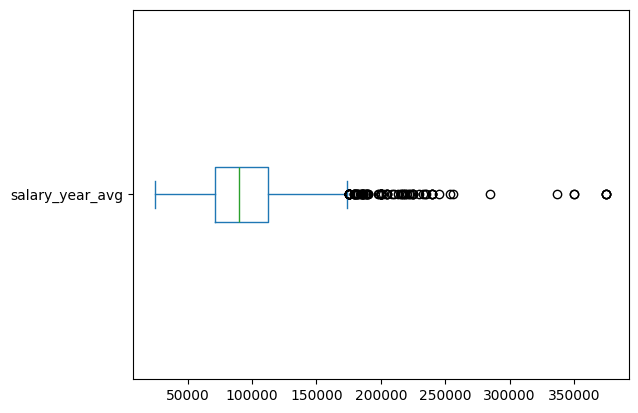

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box', vert =False)

C:\Users\mamth\AppData\Local\Temp\ipykernel_6704\3573880198.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\mamth\AppData\Local\Temp\ipykernel_6704\3573880198.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\mamth\AppData\Local\Temp\ipykernel_6704\3573880198.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\mamth\AppData\Local\Temp\ipykernel_6704\3573880198.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, lab

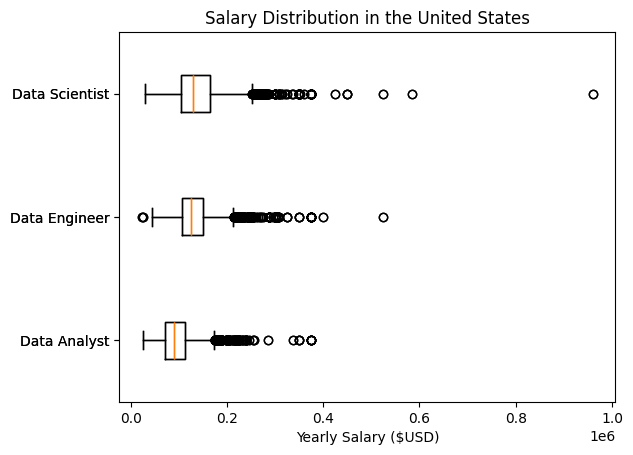

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] =='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
#plt.xlim(0,6000)
plt.show()


In [13]:
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [16]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64